<a href="https://colab.research.google.com/github/Ajasahmed3182/DM_Programming-Assignment/blob/main/Pedda_Shali_DM_1_programing_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings

from PIL import Image
from skimage.color import rgb2gray
import xml.etree.ElementTree as ET
from skimage import io, exposure, filters

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

In [ ]:
image_dir = "/content/drive/MyDrive/ajas/images"
annotation_dir = "/content/drive/MyDrive/ajas/annotations"


In [ ]:
class_names = ['Borzoi', 'Doberman', 'Komondor', 'Brittany_spaniel']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class_paths = ['n02107142-Doberman','n02090622-borzoi','n02105505-komondor','n02101388-Brittany_spaniel']

In [ ]:
new_dir = "/content/drive/MyDrive/ajas/processed"

## 2. Edge histogram Data

In [ ]:
df = pd.DataFrame(columns = list(range(0,36))+['class'])
for class_ in class_paths:
  class_path = os.path.join(new_dir,class_)
  for filename in os.listdir(class_path):
    img = io.imread(os.path.join(class_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    for i in class_names:
      if i.lower() in class_.lower():
        break
    df.loc[len(df)] = list(hist)+[class_names.index(i)]




In [ ]:
df.to_csv("/content/drive/MyDrive/data_mining/edge_data.csv")

## 3 Split into Test Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.array(df[df.columns[:-1]])
y = np.array(df['class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## 4, 5 Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scalled_x_train = scaler.transform(X_train)
scalled_x_test = scaler.transform(X_test)

## 6 KNN K-fold

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [ ]:
mean_val_errors_std = []
mean_val_errors_strat = []
mean_train_errors_std = []
mean_train_errors_strat = []
k_values = [1, 3, 5, 7, 10, 20]
for k in k_values:
    # Standard 5-fold cross-validation
    kf = KFold(n_splits=5)
    knn1 = KNeighborsClassifier(n_neighbors=k)
    val_scores_std = cross_val_score(knn1, scalled_x_train, y_train, cv=kf)
    train_scores_std = knn1.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_std.append(1 - np.mean(val_scores_std))
    mean_train_errors_std.append(1 - train_scores_std)
    print(f"Standard 5-fold CV, k={k}: Train accuracy: {train_scores_std},Val accuracy: {np.mean(val_scores_std)}")

    knn2 = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5)
    val_scores_strat = cross_val_score(knn2, scalled_x_train, y_train, cv=skf)
    train_scores_strat = knn2.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_strat.append(1 - np.mean(val_scores_strat))
    mean_train_errors_strat.append(1 - train_scores_strat)
    print(f"Stratified 5-fold CV, k={k}: Train accuracy: {train_scores_strat},Val accuracy {np.mean(val_scores_strat)}")


Standard 5-fold CV, k=1: Train accuracy: 0.9917525773195877,Val accuracy: 0.2824742268041237
Stratified 5-fold CV, k=1: Train accuracy: 0.9917525773195877,Val accuracy 0.2865979381443299
Standard 5-fold CV, k=3: Train accuracy: 0.6041237113402061,Val accuracy: 0.27422680412371137
Stratified 5-fold CV, k=3: Train accuracy: 0.6041237113402061,Val accuracy 0.2804123711340206
Standard 5-fold CV, k=5: Train accuracy: 0.5154639175257731,Val accuracy: 0.31752577319587627
Stratified 5-fold CV, k=5: Train accuracy: 0.5154639175257731,Val accuracy 0.3216494845360825
Standard 5-fold CV, k=7: Train accuracy: 0.49690721649484537,Val accuracy: 0.3463917525773196
Stratified 5-fold CV, k=7: Train accuracy: 0.49690721649484537,Val accuracy 0.3463917525773196
Standard 5-fold CV, k=10: Train accuracy: 0.4762886597938144,Val accuracy: 0.3134020618556701
Stratified 5-fold CV, k=10: Train accuracy: 0.4762886597938144,Val accuracy 0.3237113402061855
Standard 5-fold CV, k=20: Train accuracy: 0.412371134020618

In [ ]:
import matplotlib.pyplot as plt

## 6 a

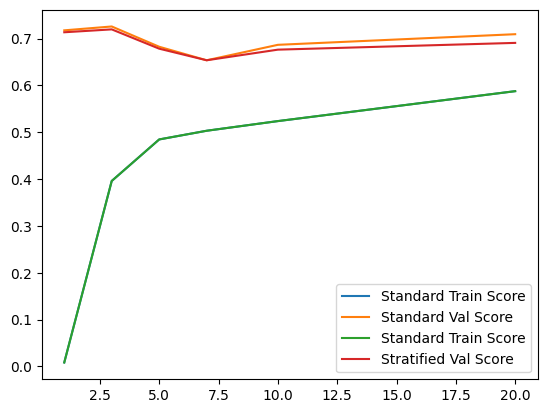

In [ ]:
fig,ax = plt.subplots()
ax.plot(k_values,mean_train_errors_std,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_std,label="Standard Val Score")
ax.plot(k_values,mean_train_errors_strat,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_strat,label="Stratified Val Score")
ax.legend()
plt.show()

In [ ]:
print(f"Lowest Standrad Training mean Error is {np.min(mean_train_errors_std)} at  k =  {k_values[np.argmin(mean_train_errors_std)]}")
print(f"Lowest Standrad Val mean Error is {np.min(mean_val_errors_std)}  at  k = {k_values[np.argmin(mean_val_errors_std)]}")
print(f"Lowest Stratified Training mean Error is {np.min(mean_train_errors_strat)} at k = {k_values[np.argmin(mean_train_errors_strat)]}")
print(f"Lowest Stratified Val mean Error is {np.min(mean_val_errors_strat)} at k = {k_values[np.argmin(mean_val_errors_strat)]}")

Lowest Standrad Training mean Error is 0.008247422680412342 at  k =  1
Lowest Standrad Val mean Error is 0.6536082474226804  at  k = 7
Lowest Stratified Training mean Error is 0.008247422680412342 at k = 1
Lowest Stratified Val mean Error is 0.6536082474226804 at k = 7


Overfiting at K =1 as Train error is low and val error is high.

## 6 b

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scalled_x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
error = 1- knn.score(scalled_x_test,y_test)

In [ ]:
error

0.6721311475409837

As Stratified Val error is lowest at k = 7

Test Score = 0.6721311475409837

## 7 Performance Comparison

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def train_clf(clf,X,y):
  val_accs = []
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  for fold, (start_train_index, val_index) in enumerate(skf.split(X, y)):
    X_start_train, X_val = X[start_train_index], X[val_index]
    y_start_train, y_val = y[start_train_index], y[val_index]
    clf.fit(X_start_train, y_start_train)
    y_pred = clf.predict(X_val)
    val_acc= accuracy_score(y_val,y_pred)
    val_accs.append(val_acc)
  return val_accs


In [ ]:
def plot_test_data_confusion_matrix(clf,name,X_test,y_test,class_names):
  fig, axes = plt.subplots(1, 1)
  y_pred = clf.predict(X_test)
  cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

  im = axes.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)

  axes.set_xticks(np.arange(len(class_names)))
  axes.set_yticks(np.arange(len(class_names)))
  axes.set_xticklabels(class_names,rotation=45)
  axes.set_yticklabels(class_names)
  for i in range(len(class_names)):
      for j in range(len(class_names)):
          axes.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

  cbar = fig.colorbar(im, ax=axes, shrink=0.6)
  cbar.ax.set_ylabel('Number of samples')

  fig.suptitle(f'Confusion matrices for {name}')

  plt.show()


## 7 a, b

In [ ]:
decision_tree_clf = DecisionTreeClassifier(max_depth=10)

In [ ]:
decision_tree_val_acc = train_clf(decision_tree_clf,scalled_x_train,y_train)

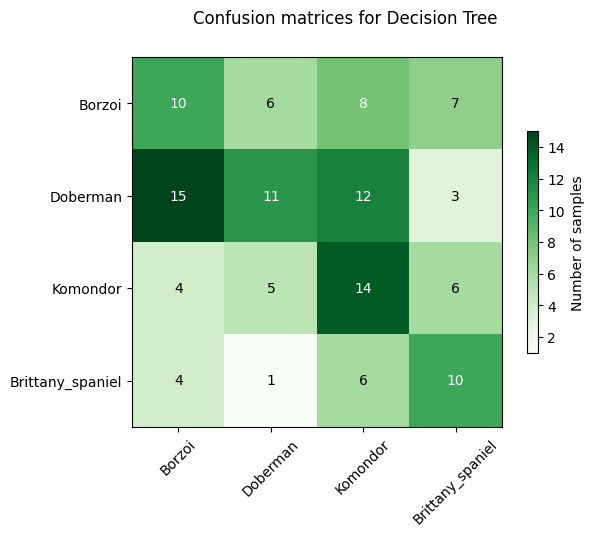

In [ ]:
plot_test_data_confusion_matrix(decision_tree_clf,"Decision Tree",scalled_x_test,y_test, class_names)

In [ ]:
print(f"Decision Tree mean accuracy accross all k folds is {np.mean(decision_tree_val_acc)}")

Decision Tree mean accuracy accross all k folds is 0.2927835051546392


In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10, ))

In [ ]:
mlp_val_acc = train_clf(mlp_clf,scalled_x_train,y_train)

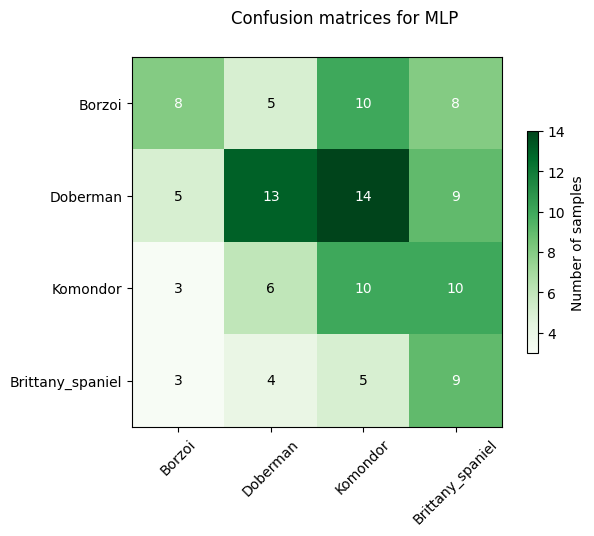

In [ ]:
plot_test_data_confusion_matrix(mlp_clf,"MLP",scalled_x_test,y_test,class_names)

In [ ]:
print(f"Neural Network mean accuracy accross all k folds is {np.mean(mlp_val_acc)}")

Neural Network mean accuracy accross all k folds is 0.3051546391752577


In [ ]:
forest_clf = RandomForestClassifier()

In [ ]:
forest_val_acc = train_clf(forest_clf,scalled_x_train,y_train)

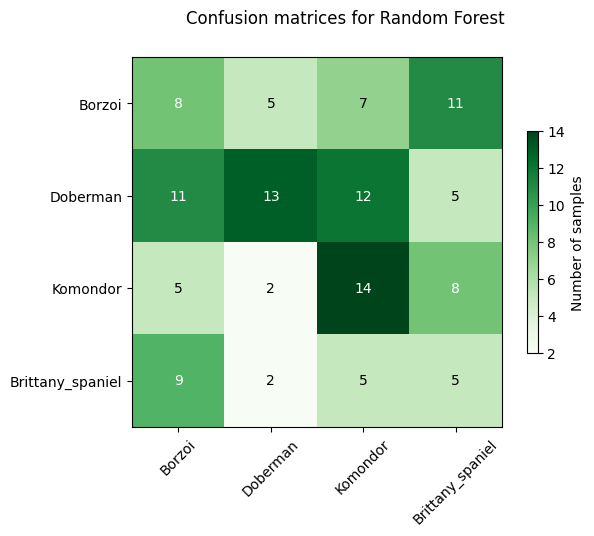

In [ ]:
plot_test_data_confusion_matrix(forest_clf,"Random Forest",scalled_x_test,y_test,class_names)

In [ ]:
print(f"random Forest mean accuracy accross all k folds is {np.mean(forest_val_acc)}")


random Forest mean accuracy accross all k folds is 0.3072164948453608


visually camparing from confusion matrix plot we can see that decision tree has the heighest values diagonally. so that is the best one (decision Tree)

based on mean validation accuracies random Forest is the best method with val acc = 0.3072164948453608

## 7 c,d

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
def calculate_f1_score(clf,X_test,y_test):
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  f1_micro = f1_score(y_test, y_pred, average='micro')
  return f"Accuracy: {acc} and F1 score :{f1_micro}"


In [ ]:
print("Decision Tree details ",calculate_f1_score(decision_tree_clf,scalled_x_test,y_test))

Decision Tree details  Accuracy: 0.36885245901639346 and F1 score :0.36885245901639346


In [ ]:
print("Neural Netwrok details ",calculate_f1_score(mlp_clf,scalled_x_test,y_test))

Neural Netwrok details  Accuracy: 0.32786885245901637 and F1 score :0.32786885245901637


In [ ]:
print("Random Forest details ",calculate_f1_score(forest_clf,scalled_x_test,y_test))


Random Forest details  Accuracy: 0.3360655737704918 and F1 score :0.3360655737704918


Decision Tree is best in both Test accuracy and F1 score